In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import sys
import logging
from typing import Tuple, Optional

import numpy as np
import tqdm.auto as tqdm
import matplotlib.pyplot as plt

from lio import benchmark
from lio import optimization

In [23]:
bnfn = benchmark.get_function('brown')

history = optimization.optimize_fn(
    bnfn.function,
    n_agents=10,
    n_vars=10,
    n_hyper_dims=4,
    n_iters=100,
    lb=bnfn.lb,
    ub=bnfn.ub
)

lio_histories = []
agent_iterator = tqdm.tqdm(history.best_agent)
for ag in agent_iterator:
    agent_iterator.set_description('BHA for each iteration')
    lio_histories.append(
        optimization.finetune_projection(bnfn.function, np.asarray(ag[0]), bnfn.lb, bnfn.ub)
    )

Original: 36.845085286510134
Lio     : 18.764585189484677
LIO improved the baseline by 18.081 (49.07% improvement in 0.0981s)


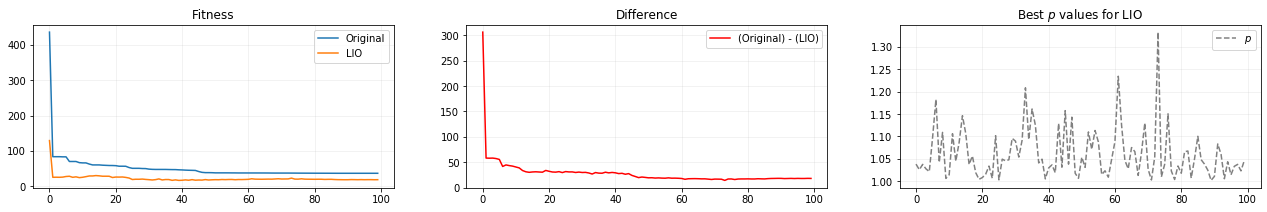

In [24]:
original_fitness = [ag[-1] for ag in history.best_agent]
lio_fitness = [ag.best_agent[-1][1] for ag in lio_histories]
p_history = [ag.best_agent[-1][0] for ag in lio_histories]

plt.figure(figsize=(22, 3))
plt.subplot(131)
plt.plot(original_fitness, label='Original')
plt.plot(lio_fitness, label='LIO')
plt.grid(alpha=0.2)
plt.title('Fitness')
plt.legend()

plt.subplot(132)
delta = np.asarray(original_fitness) - np.asarray(lio_fitness)
plt.title('Difference')
plt.grid(alpha=0.2)
plt.plot(delta, 'red', label='(Original) - (LIO)')
plt.legend()

plt.subplot(133)
plt.title('Best $p$ values for LIO')
plt.plot(np.asarray(p_history).flatten(), '--', c='gray', label='$p$')
plt.grid(alpha=0.2)
plt.legend()

ba = original_fitness[-1]
bb = lio_fitness[-1]
print(f'Original: {ba}\nLio     : {bb}')
print(f'LIO improved the baseline by {delta[-1]:5.5} ({(1-bb/ba)*100:4.4}% improvement in {lio_histories[-1].time[0]:4.4}s)')